In [ ]:
# fit_predict - single shot
# MinMaxScaler - normalises between 0 and 1
# inertia_ - finds the sum of squared error

# 📌 K-Means Clustering – High Level Overview

## 🔹 What is K-Means?
K-Means is an **unsupervised machine learning algorithm** used to **group data into clusters** based on similarity.

---

## 🔹 Basic Idea 

1. Choose **K random points** as **centroids**
2. Measure the **distance** between each data point and the centroids
3. Assign each data point to the **nearest centroid**
4. Recalculate the centroid of each cluster
5. Repeat steps 2–4 until centroids stop changing

📌 *Smaller distance → data point belongs to that centroid*

---

## 🔹 Distance Measurement
- Usually **Euclidean distance**
- Data point goes to the **closest centroid**

---

## 🔹 Elbow Method (Choosing K)

- Used to find the **optimal number of clusters**
- Plot **K vs Error** (error - sum of squared error)
- The point where the graph bends like an **elbow** is the best K

📌 This avoids too many or too few clusters

---

## 🔹 Sum of Squared Error (SSE)

- Measures how close data points are to their centroids
- Lower SSE → better clustering

Formula idea:
- Distance from point to centroid
- Square it
- Sum for all points

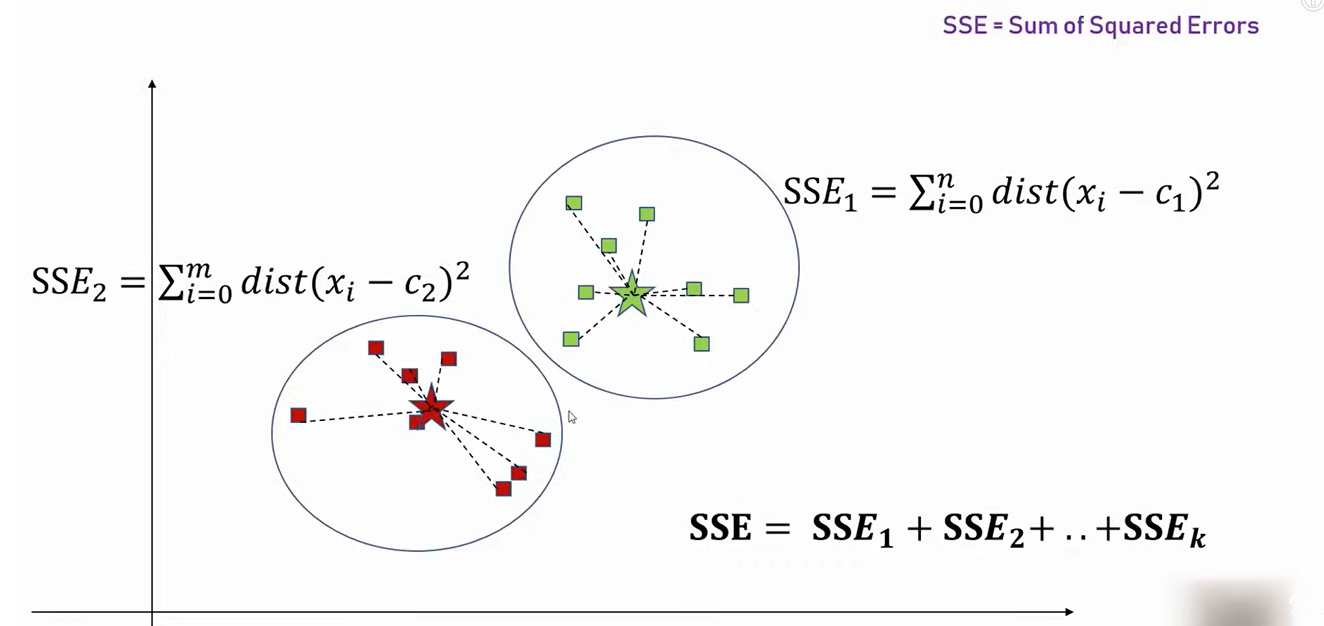
---

## 🔹 Inertia

- `inertia_` in K-Means = **Sum of Squared Error**
- Used internally to evaluate cluster quality
- Lower inertia = tighter clusters

---

## 🔹 Why MinMaxScaler is Used in K-Means

- K-Means is **distance-based**
- Features with larger values dominate distance calculation
- MinMaxScaler scales values between **0 and 1**

📌 This ensures **fair distance comparison**

---

## 🔹 fit_predict()

- Performs **training + prediction** in one step
- Assigns cluster labels to each data point

(fit_predict isn't same as the fit_transform)


In [43]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
km=KMeans(n_clusters=3)

In [44]:
df=pd.read_csv('income.csv')
df.head()


,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [45]:
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [46]:
df['cluster']=y_predicted
df

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,2
5,Gautam,39,155000,2
6,David,41,160000,2
7,Andrea,38,162000,2
8,Brad,36,156000,2
9,Angelina,35,130000,0


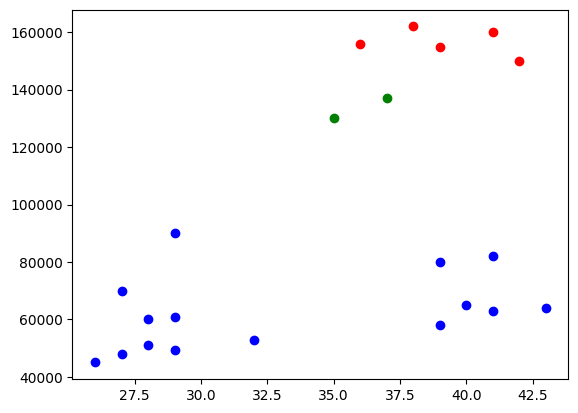

In [47]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]

plt.scatter(df0['Age'],df0['Income($)'],color='green')
plt.scatter(df1['Age'],df1['Income($)'],color='blue')
plt.scatter(df2['Age'],df2['Income($)'],color='red')

# here the 2 datapoints do not fit the plot this is because of the scaling issue to avoid this use MinMaxScaler

In [49]:
scaler=MinMaxScaler()
df['Income($)']=scaler.fit_transform(df[['Income($)']])
# df['Income($)']=scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,0


In [38]:
km=KMeans(n_clusters=3)
# y_predicted=km.fit_predict(df[['Age','Income($)']])
km.fit(df[['Age','Income($)']])
y_predicted=km.predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [39]:
km.cluster_centers_
# centeroid values

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

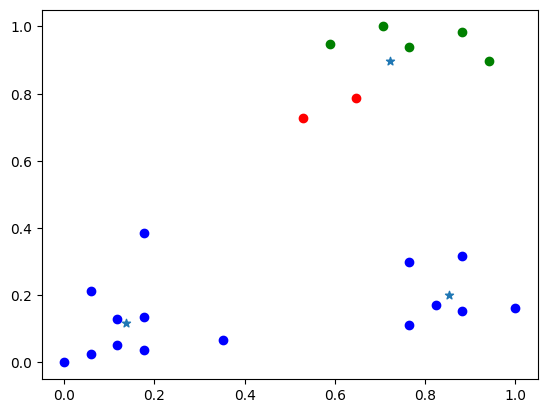

In [40]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker="*")

plt.scatter(df0['Age'],df0['Income($)'],color='green')
plt.scatter(df1['Age'],df1['Income($)'],color='blue')
plt.scatter(df2['Age'],df2['Income($)'],color='red')

In [34]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
sse

[39748147729.803085,
 3318233335.436547,
 1577045456.6365886,
 843929168.5918685,
 296500001.4466964,
 242500001.16757292,
 213666667.91032293,
 163550001.12674242,
 95133334.29682814]

Text(0, 0.5, 'sum of squared error(sse)')

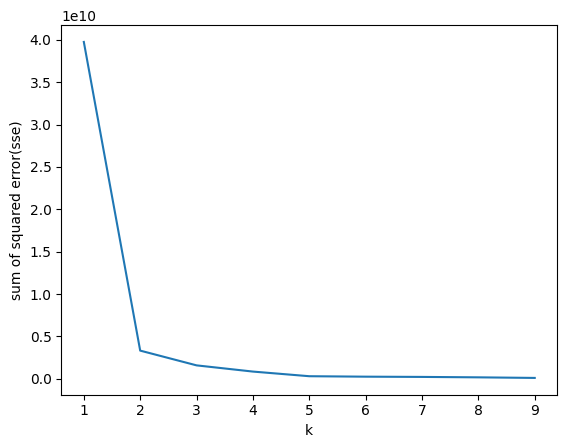

In [35]:
plt.plot(k_rng,sse)
plt.xlabel('k')
plt.ylabel('sum of squared error(sse)')
# from this it is clear that value 3 is suitable for k